<a href="https://colab.research.google.com/github/Tsaakshi/ML/blob/main/23070241044_SAAKSHITOMAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING** <br>
**REGRESSION- GEOSPATIAL DATA**
<br>
**SAAKSHI TOMAR**
<br>
**23070241044**

**Q3. IMPLEMENT A BINARY CLASSIFIER USING LULC CLASSIFICATION (2 CLASSES)**


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

**Give path of csv file**


In [21]:
csv_path="/content/class_id_table.csv"

**Read csv file**

In [22]:
dataset=pd.read_csv(csv_path)

**View first 5 rows to check the content of data**

In [23]:
dataset.head()

,X,Y,CID,Label,Band3,Band4,Band5,NDVI
0,335201.911980,2.060431e+06,0,1,9563,9112,19103,0.354102
1,381166.327171,2.036725e+06,0,0,10095,10220,15254,0.197613
2,347027.254167,2.033682e+06,0,0,9057,8534,9016,0.027464
3,340277.737972,2.047569e+06,0,1,8762,8357,13963,0.251165
4,389952.180286,2.035266e+06,0,0,10686,10642,16380,0.212345


**Extract features**

In [24]:
features=dataset[['NDVI','Band3','Band4', 'Band5']]

In [54]:
corr=features.corr()

**Plot features correlation**

<function matplotlib.pyplot.show(close=None, block=None)>

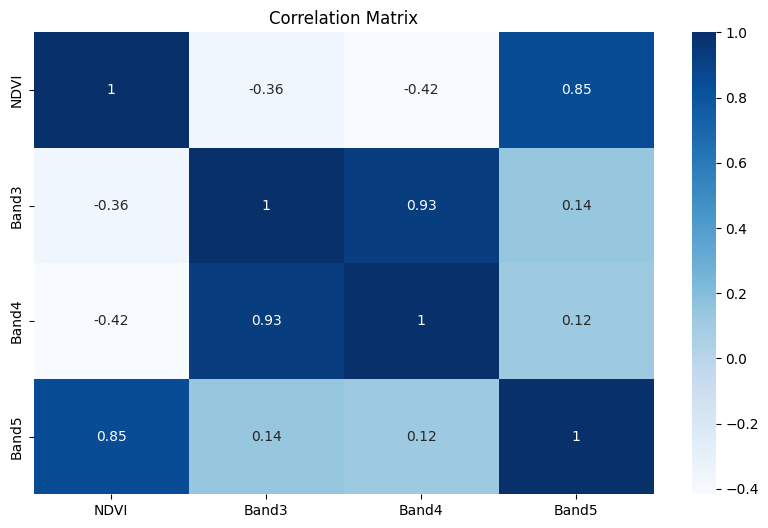

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.title('Correlation Matrix')
plt.show

**Extract target**

In [25]:
target=dataset['Label']

**Initialize Gradient Boosting Classifier**

In [26]:
classifier=LogisticRegression()

**Split data into training & testing sets (80%-training, 20%-testing)**

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.2,random_state=42)

**Train the model on the training data**

In [28]:
classifier.fit(X_train,Y_train)

LogisticRegression()

**Make prediction on the testing data**

In [29]:
Y_predict=classifier.predict(X_test)

**Calculate accuracy of the model**

In [30]:
accuracy=accuracy_score(Y_test,Y_predict)
print("Accuracy:",accuracy)

Accuracy: 0.875


**Calculate Confusion Matrix**

In [32]:
confusion_matr=confusion_matrix(Y_test,Y_predict)
class_report=classification_report(Y_test,Y_predict)
print("Class Report:",class_report)
print("Confusion Matrix:",confusion_matr)

Class Report:               precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.81      0.87      0.84        15

    accuracy                           0.88        40
   macro avg       0.86      0.87      0.87        40
weighted avg       0.88      0.88      0.88        40

Confusion Matrix: [[22  3]
 [ 2 13]]


**Plot Confusion Matrix**

<function matplotlib.pyplot.show(close=None, block=None)>

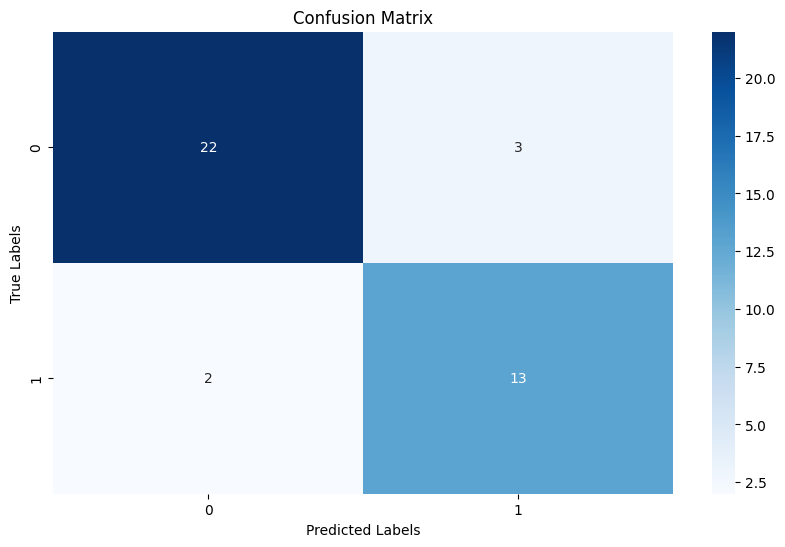

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matr,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show

**Get Confidence Score for model**




In [35]:
confidence_score=classifier.score(X_test,Y_test)
print("Confidence Score:",confidence_score)

Confidence Score: 0.875


**Load data from csv**

In [36]:
csv_path=('/content/predict.csv')

In [37]:
predict=pd.read_csv(csv_path)

In [39]:
print(predict)

                 X             Y  CID  Label  Band3  Band4  Band5      NDVI
0    335201.911980  2.060431e+06    0      1   9563   9112  19103  0.354102
1    381166.327171  2.036725e+06    0      0  10095  10220  15254  0.197613
2    347027.254167  2.033682e+06    0      0   9057   8534   9016  0.027464
3    340277.737972  2.047569e+06    0      1   8762   8357  13963  0.251165
4    389952.180286  2.035266e+06    0      0  10686  10642  16380  0.212345
..             ...           ...  ...    ...    ...    ...    ...       ...
195  351598.824933  2.050213e+06    0      0   9187   9068  14043  0.215265
196  348950.511305  2.029598e+06    0      0   8652   8127   8399  0.016459
197  391711.289660  2.036933e+06    0      0   9937   9634  14819  0.212039
198  338666.074049  2.067359e+06    0      0   9823   9722  15622  0.232797
199  398360.566690  2.051876e+06    0      0  10165   9640  15685  0.238697

[200 rows x 8 columns]


In [41]:
features_to_predict=predict[['NDVI','Band3','Band4','Band5']]

In [42]:
features_to_predict.head()

,NDVI,Band3,Band4,Band5
0,0.354102,9563,9112,19103
1,0.197613,10095,10220,15254
2,0.027464,9057,8534,9016
3,0.251165,8762,8357,13963
4,0.212345,10686,10642,16380


**Make predictions on testing data**

In [44]:
predicted_data=classifier.predict(features_to_predict)
predict['Label']=predicted_data
print(predict)

                 X             Y  CID  Label  Band3  Band4  Band5      NDVI
0    335201.911980  2.060431e+06    0      1   9563   9112  19103  0.354102
1    381166.327171  2.036725e+06    0      0  10095  10220  15254  0.197613
2    347027.254167  2.033682e+06    0      0   9057   8534   9016  0.027464
3    340277.737972  2.047569e+06    0      1   8762   8357  13963  0.251165
4    389952.180286  2.035266e+06    0      0  10686  10642  16380  0.212345
..             ...           ...  ...    ...    ...    ...    ...       ...
195  351598.824933  2.050213e+06    0      0   9187   9068  14043  0.215265
196  348950.511305  2.029598e+06    0      0   8652   8127   8399  0.016459
197  391711.289660  2.036933e+06    0      0   9937   9634  14819  0.212039
198  338666.074049  2.067359e+06    0      0   9823   9722  15622  0.232797
199  398360.566690  2.051876e+06    0      1  10165   9640  15685  0.238697

[200 rows x 8 columns]


In [45]:
predict.to_csv('predict.csv',index=False)

**Different Plotting for undersdanding the Relation and Predicted Output**

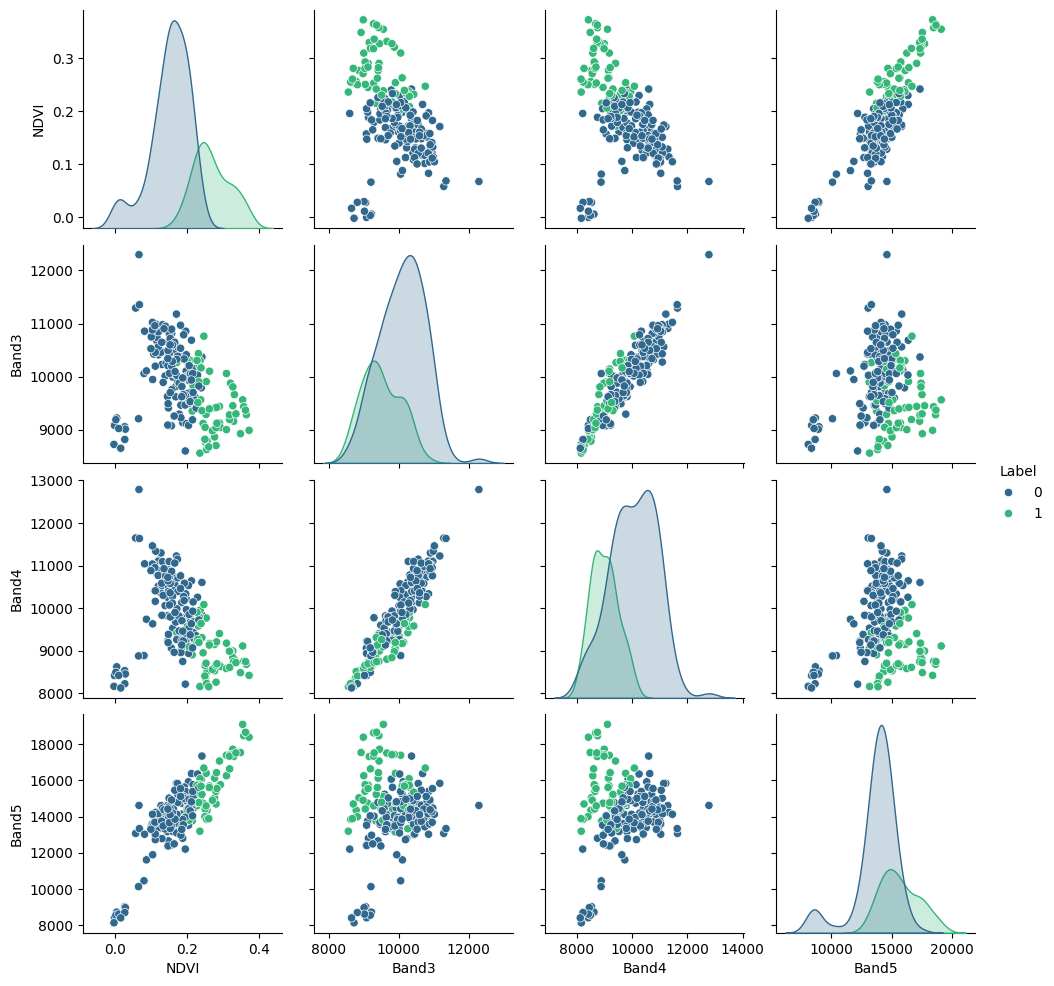

In [60]:
#Pairplot

import seaborn as sns

sns.pairplot(predict[['NDVI', 'Band3', 'Band4', 'Band5', 'Label']], hue='Label', palette='viridis')
plt.show()


**PCA**: **Plotting the most important variables**

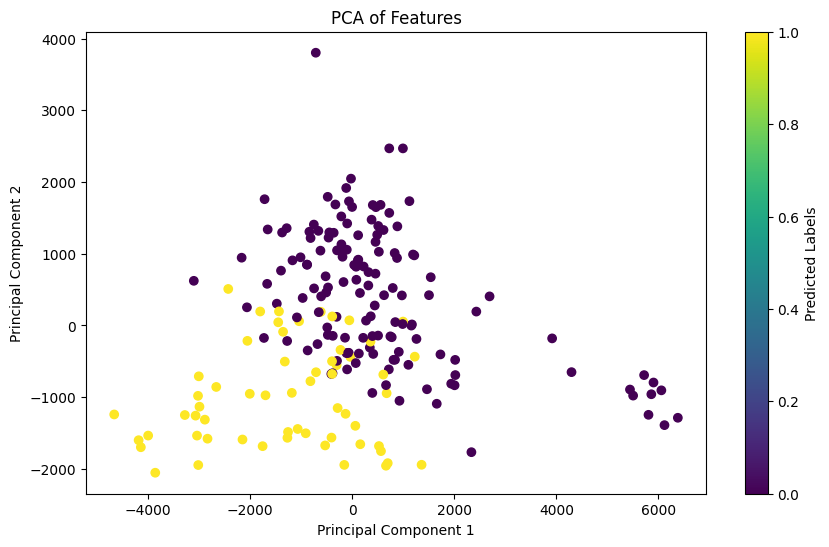

In [50]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(predict[['NDVI', 'Band3', 'Band4', 'Band5']])

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Label'] = predict['Label']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Label'], cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Features')
plt.colorbar(scatter, label='Predicted Labels')
plt.show()
